<a href="https://colab.research.google.com/github/diiogorezende/Projeto-Aplicado-II/blob/main/Projeto_Aplicado_02_Aplicando_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import bz2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import swifter
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

In [ ]:
# Usando lib do kaggle para download do dataset
path = kagglehub.dataset_download("bittlingmayer/amazonreviews")

print("Path to dataset files:", path)

100%|██████████| 493M/493M [00:17<00:00, 30.0MB/s] 

Extracting files...


Path to dataset files: C:\Users\joao.fontebasso\.cache\kagglehub\datasets\bittlingmayer\amazonreviews\versions\7


In [ ]:
def read_txt(path_file):
  """
  Essa função retorna um DataFrame a partir dos arquivos txt.
  """
  data = []

  with bz2.open(path_file, 'rt', encoding='utf-8') as file:
    for linha in file:
      partes = linha.split(' ', 1)
      if len(partes) == 2:
        label = partes[0]
        text = partes[1].strip()
        data.append([label, text])
  return pd.DataFrame(data, columns=['label', 'text'])

path_train = f'{path}/train.ft.txt.bz2'
path_test = f'{path}/test.ft.txt.bz2'

In [43]:
# Leitura dos dados
df_train = read_txt(path_train)

In [ ]:
# Leitura dos dados
df_test = read_txt(path_test)

In [ ]:
# Exibição das primeiras linhas
print("Dados de treino:\n")
print(df_test.head())

Dados de treino:

        label                                               text
0  __label__2  Great CD: My lovely Pat has one of the GREAT v...
1  __label__2  One of the best game music soundtracks - for a...
2  __label__1  Batteries died within a year ...: I bought thi...
3  __label__2  works fine, but Maha Energy is better: Check o...
4  __label__2  Great for the non-audiophile: Reviewed quite a...


In [ ]:
# Exibição das primeiras linhas
print("Dados de teste:\n")
print(df_train.head())

Dados de teste:

        label                                               text
0  __label__2  Stuning even for the non-gamer: This sound tra...
1  __label__2  The best soundtrack ever to anything.: I'm rea...
2  __label__2  Amazing!: This soundtrack is my favorite music...
3  __label__2  Excellent Soundtrack: I truly like this soundt...
4  __label__2  Remember, Pull Your Jaw Off The Floor After He...


In [45]:
# Redução dos dados em cada DF, mas garantindo a mesma quantidade por label
df_train = df_train.groupby('label').sample(n=100000, random_state=42)
df_test = df_test.groupby('label').sample(n=25000, random_state=42)

In [23]:
# Formato dos dados de treino
df_train.shape

(200000, 2)

In [21]:
# Formato dos dados de test
df_test.shape

(50000, 2)

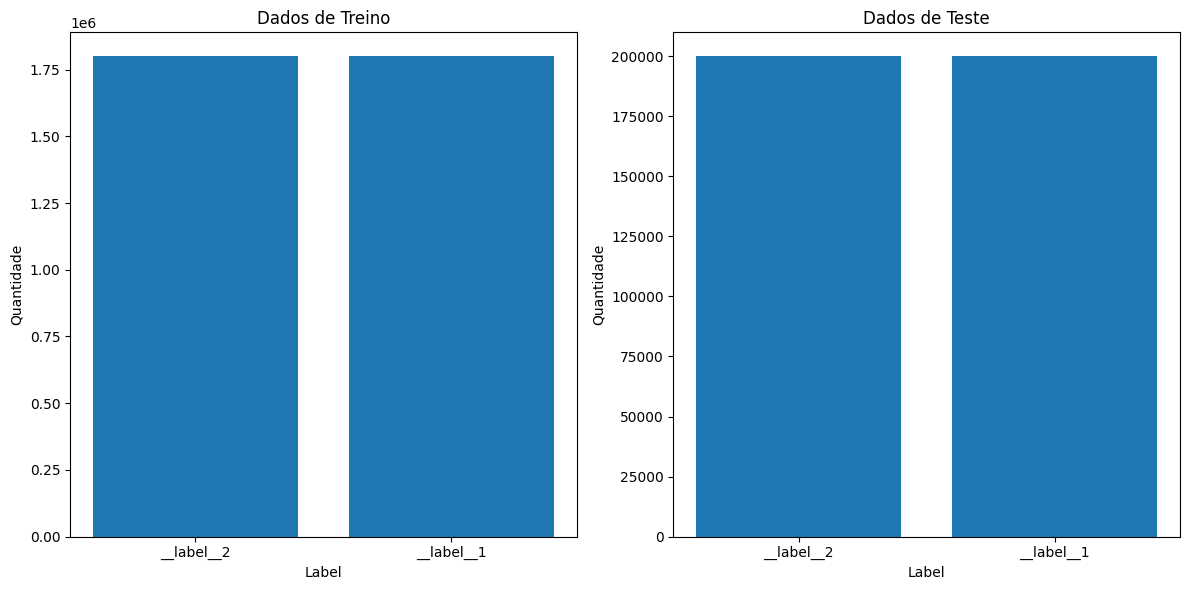

In [ ]:
# plotagem da quantidade de dados da label 1 e label 2 para o conjunto de treino e teste

count_test = df_test['label'].value_counts()
count_train = df_train['label'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(count_train.index, count_train.values)
plt.title('Dados de Treino')
plt.xlabel('Label')
plt.ylabel('Quantidade')

plt.subplot(1, 2, 2)
plt.bar(count_test.index, count_test.values)
plt.title('Dados de Teste')
plt.xlabel('Label')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show();

In [ ]:
# Exibição da contagem
print(count_test)
print(count_train)

label
__label__2    200000
__label__1    200000
Name: count, dtype: int64
label
__label__2    1800000
__label__1    1800000
Name: count, dtype: int64


In [ ]:
def common_words(df, label, n=10):
  """
  Essa funão retorna as n palavras mais comuns em um conjunto de dados.
  """

  text = df[df['label'] == label]['text']
  words = ' '.join(text).split()
  if words:
    counter = Counter(words)
    return counter.most_common(n)
  else:
    return []

In [ ]:
print(f"Palavras mais comuns na Label 01 (teste): {common_words(df_test, '__label__1')}")
print(f"Palavras mais comuns na Label 02 (teste): {common_words(df_test, '__label__2')}")

Palavras mais comuns na Label 01 (teste): [('the', 711852), ('I', 414046), ('to', 391995), ('and', 381258), ('a', 373031), ('of', 304296), ('is', 255053), ('it', 234447), ('this', 226157), ('in', 164692)]
Palavras mais comuns na Label 02 (teste): [('the', 637235), ('and', 433604), ('a', 369097), ('to', 353845), ('I', 340358), ('of', 311198), ('is', 275699), ('this', 191056), ('it', 186807), ('in', 173252)]


In [ ]:
# print(f"Palavras mais comuns na Label 01 (train): {common_words(df_train, '__label__1')}")
# print(f"Palavras mais comuns na Label 02 (train): {common_words(df_train, '__label__2')}")

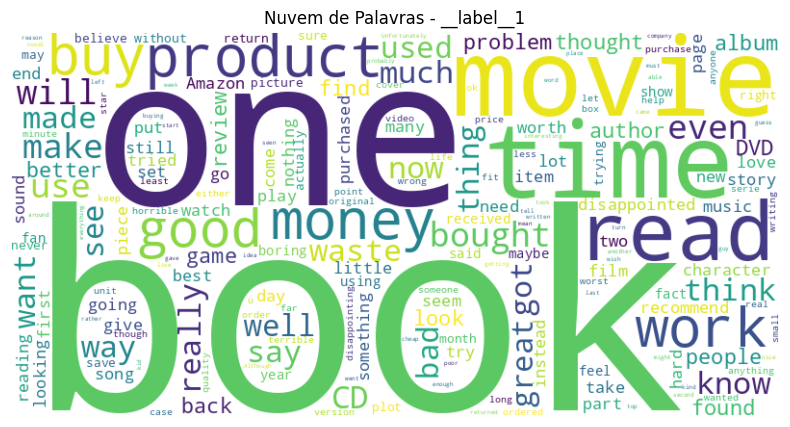

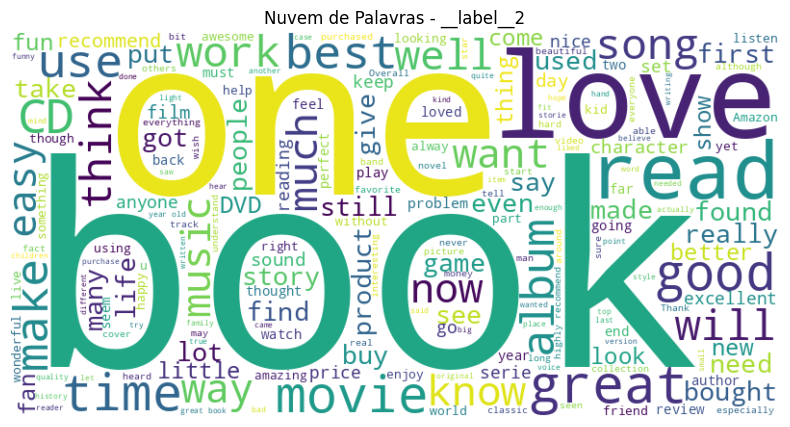

In [ ]:
# Função para gerar nuvem de palavras
def gerar_nuvem_palavras(df, rotulo):
    textos = df[df['label'] == rotulo]['text']
    texto_completo = ' '.join(textos)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - {rotulo}')
    plt.show()

# Exemplo para __label__1 e __label__2
gerar_nuvem_palavras(df_test, '__label__1')
gerar_nuvem_palavras(df_test, '__label__2')

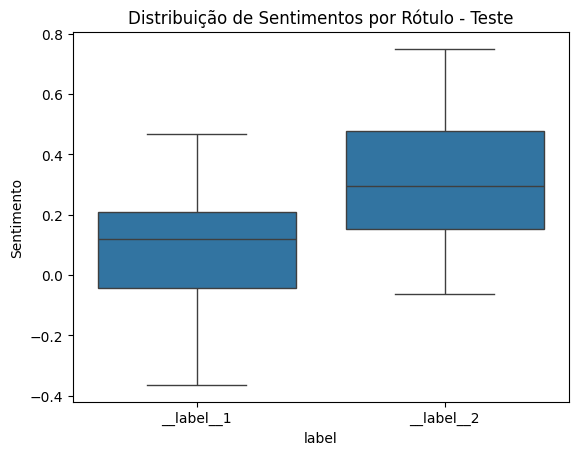

In [ ]:
# Função para calcular o sentimento
def analisar_sentimento(texto):
    return TextBlob(texto).sentiment.polarity

df_test_50 = df_test.sample(50)

# Adicionar coluna de sentimento
df_test_50['Sentimento'] = df_test_50['text'].apply(analisar_sentimento)
# df_train['Sentimento'] = df_train['text'].apply(analisar_sentimento)

# Plotar distribuição de sentimentos por rótulo
sns.boxplot(x='label', y='Sentimento', data=df_test_50)
plt.title('Distribuição de Sentimentos por Rótulo - Teste')
plt.show()

In [26]:
# Detecção de acordo com a linguagem
def detect_lg(text: str) -> str:
  try:
    return detect(text) if text.strip() else None
  except LangDetectException:
    return None

In [46]:
# Criando coluna para identificação do idioma
df_test['language'] = df_test['text'].swifter.apply(detect_lg)
df_test.head()

Pandas Apply: 100%|██████████| 50000/50000 [01:45<00:00, 472.04it/s]


,label,text,language
359422,__label__1,The worst textbook in computer science. Don't ...,en
370869,__label__1,Not very happy: We got this train for our daug...,en
327304,__label__1,"A response to a genre mystery: I'm not a big ""...",en
375554,__label__1,Broke after 2 months: I liked that the tie rac...,en
241458,__label__1,Waiting for a replacement: I'm hoping that the...,en


In [47]:
# Criando coluna para identificação do idioma
df_train['language'] = df_train['text'].swifter.apply(detect_lg)
df_train.head()

Pandas Apply: 100%|██████████| 200000/200000 [06:51<00:00, 485.83it/s]


,label,text,language
3250608,__label__1,The History of Torture and Execution: I have n...,en
3328921,__label__1,Stainless Steel shouldn't corrode... should it...,en
233979,__label__1,Another Weak Sequel To A Once Promising Franch...,en
1373704,__label__1,"Simply Awful: Contrived, trite, ""Bridget Jones...",en
955003,__label__1,"FLASH: Jeff Beck's Flash In my opinion, was no...",en


In [48]:
# Filtrando coluna language para manter apenas os reviews em inglês
df_test_en = df_test[df_test['language'] == 'en']
df_test_en.head()

,label,text,language
359422,__label__1,The worst textbook in computer science. Don't ...,en
370869,__label__1,Not very happy: We got this train for our daug...,en
327304,__label__1,"A response to a genre mystery: I'm not a big ""...",en
375554,__label__1,Broke after 2 months: I liked that the tie rac...,en
241458,__label__1,Waiting for a replacement: I'm hoping that the...,en


In [49]:
# Filtrando coluna language para manter apenas os reviews em inglês
df_train_en = df_train[df_train['language'] == 'en']
df_train_en.head()

,label,text,language
3250608,__label__1,The History of Torture and Execution: I have n...,en
3328921,__label__1,Stainless Steel shouldn't corrode... should it...,en
233979,__label__1,Another Weak Sequel To A Once Promising Franch...,en
1373704,__label__1,"Simply Awful: Contrived, trite, ""Bridget Jones...",en
955003,__label__1,"FLASH: Jeff Beck's Flash In my opinion, was no...",en


In [55]:
# Função para removeção das stop words
from gensim.parsing.preprocessing import remove_stopwords

def remove_stop_words(text: str) -> str:
    return remove_stopwords(text)

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [ ]:
# Conversão do texto para minúscula para aplicação da função que remove stop words
df_train_en['text'] = df_train_en['text'].str.lower()
df_train_en['text_not_stop_words'] = df_train_en['text'].swifter.apply(remove_stop_words)
df_train_en.head()

C:\Users\joao.fontebasso\AppData\Local\Temp\ipykernel_33716\3401327732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_en['text'] = df_train_en['text'].str.lower()
Pandas Apply: 100%|██████████| 199532/199532 [00:01<00:00, 115757.48it/s]
C:\Users\joao.fontebasso\AppData\Local\Temp\ipykernel_33716\3401327732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_en['text_not_stop_words'] = df_train_en['text'].swifter.apply(remove_stop_words)


,label,text,language,text_not_stop_words
3250608,__label__1,"the history of torture and execution: i have not yet received the book ordered even though, i paid a rather high price for it. i have been unable to get a response from the seller, and am beginning to think that they may be something ""less than reputable"".james j. ebyrating- ""zero stars""!",en,"history torture execution: received book ordered though, paid high price it. unable response seller, beginning think ""less reputable"".james j. ebyrating- ""zero stars""!"
3328921,__label__1,"stainless steel shouldn't corrode... should it?: we were really pleased when we first received and used this knife set. its appearance was very professional, the handles very user friendly, and the edges were very sharp. however, after using the set and following the care directions for a few months, it became apparent that something was very wrong. the 3 1/4"" and 5"" blades started to show black spots and then began to corrode. now the 3 1/4"" paring knife blade has so much decay that it can be nearly described as a serrated blade. the manufacturer offers a ""limited lifetime warranty"" so we will soon see what that means. we are very disappointed with this product at any price!",en,"stainless steel shouldn't corrode... it?: pleased received knife set. appearance professional, handles user friendly, edges sharp. however, set following care directions months, apparent wrong. 3 1/4"" 5"" blades started black spots began corrode. 3 1/4"" paring knife blade decay nearly described serrated blade. manufacturer offers ""limited lifetime warranty"" soon means. disappointed product price!"
233979,__label__1,another weak sequel to a once promising franchise: hellraiser: heatseeker is a film that i wanted to enjoy. i thought the first direct to video hellraiser sequel was decent but this one is just patheic consdering it has ashley laurence in it. i would only say you see this film if you need a movie to fall asleep on.,en,weak sequel promising franchise: hellraiser: heatseeker film wanted enjoy. thought direct video hellraiser sequel decent patheic consdering ashley laurence it. film need movie fall asleep on.
1373704,__label__1,"simply awful: contrived, trite, ""bridget jones's diary"" wannabe. so glad that i borrowed this from the library and did not spend hard-earned cash. a frivolous story about a london plain jane and her struggles to land the boy - and career - of her dreams. 291 pages of pure fluff.",en,"simply awful: contrived, trite, ""bridget jones's diary"" wannabe. glad borrowed library spend hard-earned cash. frivolous story london plain jane struggles land boy - career - dreams. 291 pages pure fluff."
955003,__label__1,"flash: jeff beck's flash in my opinion, was not one of his better albums.""gets us all in the end"" is a hard driving rocker.""people get ready"" with rod stewart on vocals is a classic!take these 2 tracks out of there, and this was a new sound experimentgone south! too much of that new wave sound which was becoming increasinglypopular in the 80's. just not my cup of tea.but if that sound is you go for it! jeff beck is still one of the all timebest guitarist's that ever played an ax.",en,"flash: jeff beck's flash opinion, better albums.""gets end"" hard driving rocker.""people ready"" rod stewart vocals classic!take 2 tracks there, new sound experimentgone south! new wave sound increasinglypopular 80's. cup tea.but sound it! jeff beck timebest guitarist's played ax."
...,...,...,...,...
3001051,__label__1,"don't be fooled: i read all the reviews for this espresso maker, and decided that the good out weighed the bad... what a mistake. i really enjoyed it a first, it was my fist espresso maker and i was pleased. i followed all the direction to the letter (don't leave the handle attedched when not in use, ect...). but after 3 months it breaks!! for no reason at all one day it started to leak a ton of water while brewing and was unfixable. since it had worked fine at

In [ ]:
# Conversão do texto para minúscula para aplicação da função que remove stop words
df_test_en['text'] = df_test_en['text'].str.lower()
df_test_en['text_not_stop_words'] = df_test_en['text'].swifter.apply(remove_stop_words)
df_test_en.head()

C:\Users\joao.fontebasso\AppData\Local\Temp\ipykernel_33716\3259105978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_en['text'] = df_test_en['text'].str.lower()
Pandas Apply: 100%|██████████| 49876/49876 [00:00<00:00, 122723.15it/s]
C:\Users\joao.fontebasso\AppData\Local\Temp\ipykernel_33716\3259105978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_en['text_not_stop_words'] = df_test_en['text'].swifter.apply(remove_stop_words)


,label,text,language,text_not_stop_words
359422,__label__1,"the worst textbook in computer science. don't buy it!!: i had to buy this book because i was taking an algorithm class (2 years ago) and the instructor was the co-author of the book. i didn't learn much from this book. as far as i can remember, part of contents are copied from another yet poorly written book by horowitz (can't recall the name). almost everybody in my class had to buy another algorithm book (cormen) to pass the class.this book was useless to me and many other students in my class.don't buy it!!",en,"worst textbook science. don't buy it!!: buy book taking algorithm class (2 years ago) instructor co-author book. didn't learn book. far remember, contents copied poorly written book horowitz (can't recall name). everybody class buy algorithm book (cormen) pass class.this book useless students class.don't buy it!!"
370869,__label__1,"not very happy: we got this train for our daughters 4th birthday and when we took it out of the box the main train that pulls the rest was broken. we tried to figure out how it goes together and never did so she has not got a chance to play with it! the box was in great condition so i really do not know how it was in so many pieces when we got it! i am not happy about that, but as far as fun...can't say due to it never working!! i hope others that purchase this toy have better luck that we have had.",en,"happy: got train daughters 4th birthday took box main train pulls rest broken. tried figure goes got chance play it! box great condition know pieces got it! happy that, far fun...can't working!! hope purchase toy better luck had."
327304,__label__1,"a response to a genre mystery: i'm not a big ""genre"" reader--i picked this up for a dollar in queenstown, md. because of the hippie/cia type blurb on the back. i tore through it with relish, but i won't be repeating this genre experience any time soon. i just wanted to quote a line from ice-t that encapsulates a better path for today's writers:now i'm known and respected as creator of the crime rhymebut my lyrics are deeper, because i'mthe one that makes you think before you make a movei wrote ""pusher,"" ""high-rollers,"" and ""colors"" just to provethat i could kick game, and drop knowledge at the same time...armstrong, as far as i can tell, certainly kicks ""mystery genre game,"" but he does not drop deeper knowledge about this very interesting subject.",en,"response genre mystery: i'm big ""genre"" reader--i picked dollar queenstown, md. hippie/cia type blurb back. tore relish, won't repeating genre experience time soon. wanted quote line ice-t encapsulates better path today's writers:now i'm known respected creator crime rhymebut lyrics deeper, i'mthe makes think movei wrote ""pusher,"" ""high-rollers,"" ""colors"" provethat kick game, drop knowledge time...armstrong, far tell, certainly kicks ""mystery genre game,"" drop deeper knowledge interesting subject."
375554,__label__1,"broke after 2 months: i liked that the tie rack held so many ties. it made it easy to be organized. i wasn't crazy about how slow the rack revolved or how much noise it made, but i figured i could live with it because it held so much. unfortunately after 2 months of use, the plastic fell apart while revolving. the plastic tabs on the top piece that clip into the bottom cracked from the vibration. the ties ended up in a jumbled mess on the floor and the rack cannot be repaired. for the price it should have lasted longer.",en,"broke 2 months: liked tie rack held ties. easy organized. wasn't crazy slow rack revolved noise made, figured live held much. unfortunately 2 months use, plastic fell apart revolving. plastic tabs piece clip cracked vibration. ties ended jumbled mess floor rack repaired. price lasted longer."
241458,__label__1,"waiting for a replacement: i'm hoping that the replacement will be better.the screws that came with the unit were too long and it was extremely difficult to attach the legs.